# Naive Backtracking

The Naive Backtracking algorithm is essentially DFS.  We take a puzzle, and keep trying all the possible valid numbers in each space

To Demonstrate the efficay, we will show some metrics wit this notebook for differt problems.

First, we will compare the number of attempts the backtracking algorithm to the number of squares that is already filled to the problem

It would be usefullt o create a `SudokuGenerorator` function, but for now, we are going to use a folder we already have

Naive Backtracking ./sudoku_problems/1/1.sd


Intial Problem:
[[0 0 0 0 0 0 0 7 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]]


Solution:
False

Number of Attempts : 10000


num_problems_of_size:1

total_attempts: 10000


Naive Backtracking ./sudoku_problems/1/10.sd


Intial Problem:
[[0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [6 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]]


Solution:
False

Number of Attempts : 10000


num_problems_of_size:2

total_attempts: 20000


Naive Backtracking ./sudoku_problems/1/2.sd


Intial Problem:
[[0 0 0 0 0 9 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]]


Solution:
False

Number of Attempts : 10000


num

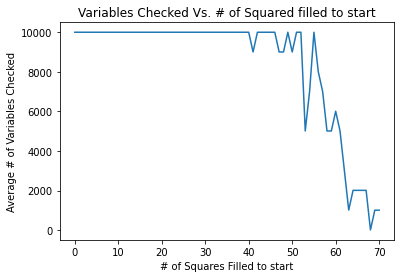

In [6]:
from os import listdir
from src.sudoku_solver import SudokuSolver
import matplotlib.pyplot as plt
from numpy import ndarray

INITAL_FOLDER = "./sudoku_problems"
MAX_ATTEMPTS = 10000
AVERAGE_NAIVE_ATTEMPTS_BY_PROBLEM_SIZE = [0] * 71
for foler_name in listdir(INITAL_FOLDER):
    problem_size = int(foler_name)
    num_problems_of_size = 0
    total_attempts = 0
    for file_name in listdir(f"{INITAL_FOLDER}/{foler_name}"):
        problem_path = f"{INITAL_FOLDER}/{foler_name}/{file_name}"
        solver = SudokuSolver(problem_path)
    
        print(f'=============================================================')
        print(f'Naive Backtracking {problem_path}\n\n')
        print(f'Intial Problem:\n{solver.initial_puzzle}\n\n')

        solution, num_attempts = solver.naive_back_tracking(max_attempts=MAX_ATTEMPTS)
        print(f"Solution:\n{solution}\n\nNumber of Attempts : {num_attempts}\n\n")
        
        num_problems_of_size += 1
        total_attempts += num_attempts if isinstance(solution,ndarray) or num_attempts == MAX_ATTEMPTS else MAX_ATTEMPTS

        print(f"num_problems_of_size:{num_problems_of_size}\n\ntotal_attempts: {total_attempts}\n\n")


    AVERAGE_NAIVE_ATTEMPTS_BY_PROBLEM_SIZE[problem_size-1] = total_attempts/num_problems_of_size


plt.plot(AVERAGE_NAIVE_ATTEMPTS_BY_PROBLEM_SIZE)
plt.ylabel("Average # of Variables Checked")
plt.xlabel("# of Squares Filled to start")
plt.title("Variables Checked Vs. # of Squared filled to start")
plt.show()

# Explanination of the ablove graph

When we have a blank board, then we fill the first row with $1,2,3,4,5,6,7,8,9$, i.e. we use 9 attempts.  on the second row, we will try $1,2,3$ and it fails in the fist square with $1,2,3$, then fails in the next square with $1,2,3,4$, then  $1,2,3,4,5$ etc.. it can easily be seen how we can very quickly use our $10,000$ attempts.  Similar arguments can be made for basically all the problem sizes.  We notice thsi drops off near the 50-70 range, because there are less blank squares.

Note, we did this with only a limeted amount of test samples, and some that have unsolvable problems.  We will build a problem generator soon, and redo this

# Forward Checking

We are going to implement an optimization to the backtracking algorithm know as `forward_checking`.  Essentailly, instead of trying every possible numberm we are going to compute the 'domains' of each tile at each step. the domain of a square is the set of all possible values a square can take with out breaking the rules of sudoku.  So instead of trying all the numbers in `range(1, 10)` try all the numbers in `domain`, and update the domains at each guess.  I.e. if we add the number 1 in a square, 1 can't go in other places, so when we are trying to insert in those places, 